# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

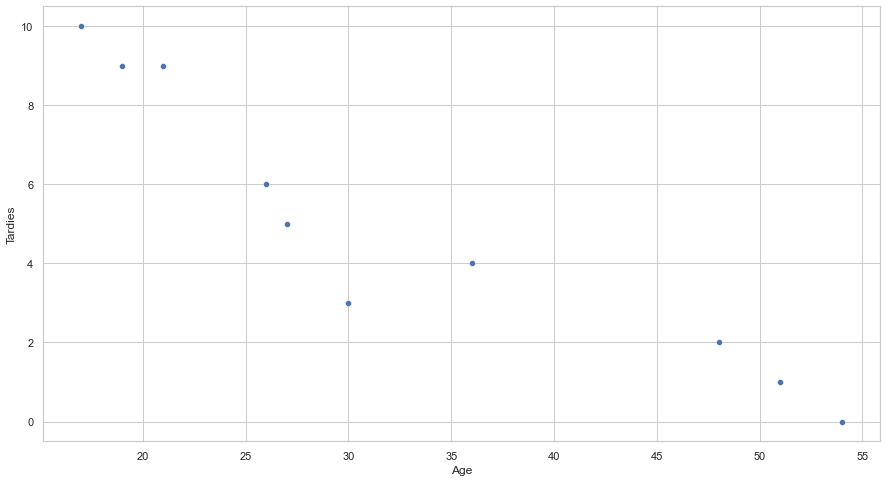

In [5]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# It seems to be a negative lineal correlation betweeen tardies and Age: As the people gets older, they are more punctual. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [9]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
#Both shows a negative relation between Age and Tardies, although the most valous information is the correlation table, as the correlation is almost the maximum negativity of -1.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(
    X = student_data[["Tardies"]], # These are the variables
    y =student_data.Age # This is OUR ONE TARGET
)

LinearRegression()

In [12]:
lr.intercept_

50.69884853852967

In [13]:
lr.coef_

array([-3.63241807])

In [14]:
student_data["prediction"] = lr.coef_[0] * student_data.Tardies + lr.intercept_

Plot your regression model on your scatter plot.

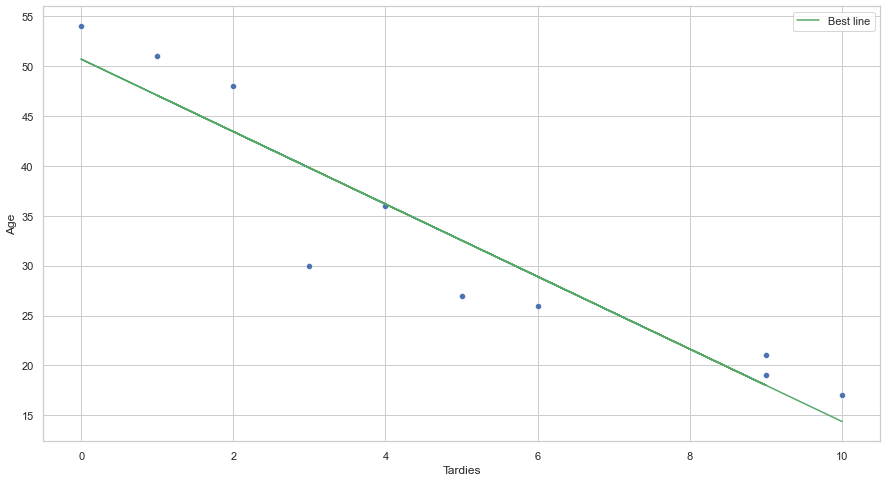

In [17]:
sns.scatterplot(x=student_data.Tardies, y=student_data.Age)
plt.plot(student_data.Tardies, student_data.prediction, label="Best line", color="g")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# As we can see observing the graph, the residuals of the regressions does not seem too high. The intercept (axis Y when X=0) starts at 50.69884853852967 and the slope is -3.63241807, just as expected in the correlation table: the higher the Age, the least the Tardies. We can not conclude of the confidence of the conclusions until we observe the P-value doing an OLS:  

In [19]:
results = smf.ols("Age ~ Tardies", data=student_data).fit()

In [20]:
results.summary()

C:\Users\gqsal\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        15:47:29   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#P-Value is less than 0.5. We Reject the Null Hypothesis, so the Tardies is relevant in this given model to know the Age or viceversa. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [21]:
vehicles = pd.read_csv('vehicles.csv', encoding="UTF-8")

In [22]:
vehicles.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
9817,Dodge,Dakota Pickup 2WD,2003,3.9,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks 2WD,Regular,19.388824,16,17,17,522.764706,1950


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [23]:
df=vehicles[["CO2 Emission Grams/Mile", "Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]

In [24]:
df.corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [ ]:
#The highest correlation is Fuel Barrels/Year, followed shortly by the Combined MPG and Fuel Cost/Year. The lowest correlated variable with our endogenous is year. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [32]:
df.rename(
    columns={"CO2 Emission Grams/Mile": "CO2", "Fuel Barrels/Year": "Barrels", "Combined MPG": "MPG","Fuel Cost/Year":"Cost" },
    inplace=True,
)

C:\Users\gqsal\AppData\Local\Temp\ipykernel_28192\2440869897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(


In [33]:
df.sample()

,CO2,Year,Cylinders,Barrels,MPG,Cost
29351,444.35,1986,4.0,16.4805,20,2000


In [34]:
results = smf.ols("CO2 ~ Year + Cylinders + Barrels + MPG + Cost", data=df).fit()

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:04:33   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    769.8883     19.392     39.702      0.000     731.880     807.897
Year          -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders      1.8788      0.083     22.598      0.000       1.716       2.042
Barrels       19.0529      0.061    311.600      0.000      18.933      19.173
MPG           -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Cost           0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
#All independent variables are significant in the C02 Emission model as the p-value is less than .05. The one with the highest Marginal Effect is the Barrels variable, with a coefficient of 19.0529. The lowest coefficient is the Fuel Cost/Year, 0.0323. So to conclude, the correlation between variables is NOT a precise indicator of the effect of a variable in a regression. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [39]:
people = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
people

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [41]:
lr.fit(
    X = people[["Attended"]], 
    y = people.Invited
)

LinearRegression()

In [42]:
people["prediction"] = lr.coef_[0] * people.Attended + lr.intercept_

In [64]:
people

,Invited,Attended,prediction,error
0,1,1,2.058824,1.058824
1,3,2,3.156863,1.156863
2,4,4,5.352941,1.352941
3,6,4,5.352941,1.352941
4,8,5,6.450980,1.450980
5,9,7,8.647059,1.647059
6,11,8,9.745098,1.745098
7,14,13,15.235294,2.235294


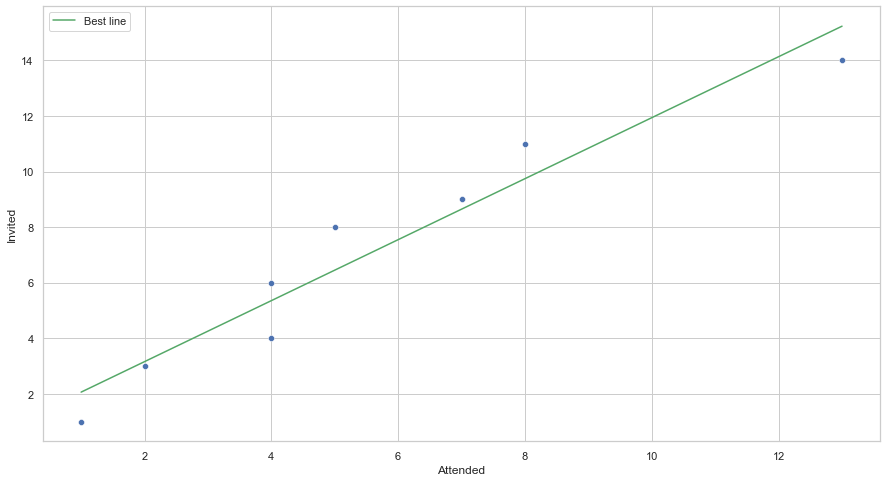

In [43]:
sns.scatterplot(x=people.Attended, y=people.Invited)
plt.plot(people.Attended, people.prediction, label="Best line", color="g")
plt.legend();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# The relation between this two variables is quite lineal. 

In [45]:
lr.intercept_

0.9607843137254894

In [46]:
lr.coef_

array([1.09803922])

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# It does not seem that there are outliers, but we will take out the farest residuals from the mean. 

In [51]:
people["error"]=(people.Attended - people.prediction).abs()
people

,Invited,Attended,prediction,error
0,1,1,2.058824,1.058824
1,3,2,3.156863,1.156863
2,4,4,5.352941,1.352941
3,6,4,5.352941,1.352941
4,8,5,6.450980,1.450980
5,9,7,8.647059,1.647059
6,11,8,9.745098,1.745098
7,14,13,15.235294,2.235294


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [52]:
people2=people[:-2]

In [53]:
people2

,Invited,Attended,prediction,error
0,1,1,2.058824,1.058824
1,3,2,3.156863,1.156863
2,4,4,5.352941,1.352941
3,6,4,5.352941,1.352941
4,8,5,6.450980,1.450980
5,9,7,8.647059,1.647059


In [57]:
lr2=LinearRegression()

In [58]:
lr2.fit(
    X = people2[["Attended"]], 
    y = people2.Invited
)

LinearRegression()

In [59]:
people2["prediction"] = lr2.coef_[0] * people2.Attended + lr2.intercept_

C:\Users\gqsal\AppData\Local\Temp\ipykernel_28192\3773179504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people2["prediction"] = lr2.coef_[0] * people2.Attended + lr2.intercept_


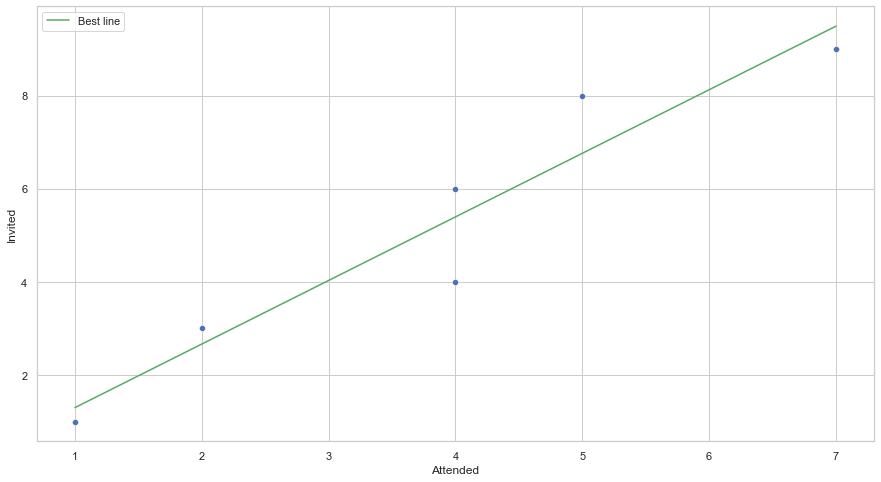

In [60]:
sns.scatterplot(x=people2.Attended, y=people2.Invited)
plt.plot(people2.Attended, people2.prediction, label="Best line", color="g")
plt.legend();

In [61]:
lr2.intercept_

-0.06569343065693634

In [62]:
lr2.coef_

array([1.3649635])

In [63]:
print(lr.intercept_, lr2.intercept_, lr.coef_, lr2.coef_)

0.9607843137254894 -0.06569343065693634 [1.09803922] [1.3649635]


In [ ]:
#Eliminating the last two rows in my dataframe, both the intercept and the coefficient has changed significatively. 